<a href="https://colab.research.google.com/github/hudahussaini/Leetcodes/blob/master/spam_ham_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/SPAM text message 20170820 - Data.csv')

In [3]:
df.head

<bound method NDFrame.head of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [4]:
df.tail

<bound method NDFrame.tail of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [6]:
df.info()
df["Category"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


ham     4825
spam     747
Name: Category, dtype: int64

In [7]:
type(df["Category"])

pandas.core.series.Series

In [8]:
#series is bad/ not usable

In [17]:
x = df.iloc[:,1].values
y = df.iloc[:,0].values
#want everything from first to last element - Second column as x and first as y

In [18]:
print(x)


['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']


In [19]:
print(y)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [20]:
type(y)

numpy.ndarray

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=0)
print(x_test.shape)

(1672,)


In [45]:
text_model = Pipeline([('tfidf', TfidfVectorizer()), ('model', MultinomialNB())])
#now we have the model and we can train it now
#confusing Vectorization or word embedding is the process of converting text data to numerical vectors

In [46]:
text_model.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', MultinomialNB())])

In [47]:
predictions = text_model.predict(x_test)

In [48]:
print(predictions, y_test)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham'] ['ham' 'spam' 'ham' ... 'ham' 'ham' 'ham']


In [49]:
accuracy_score(predictions, y_test)*100

96.05263157894737

In [50]:
confusion_matrix(predictions, y_test)

array([[1451,   66],
       [   0,  155]])

In [52]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1517
        spam       0.70      1.00      0.82       155

    accuracy                           0.96      1672
   macro avg       0.85      0.98      0.90      1672
weighted avg       0.97      0.96      0.96      1672



In [63]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [65]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in df["Message"]:
  val in str(val)
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

  comment_words += " ".join(tokens)

wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords=stopwords).generate(comment_words)

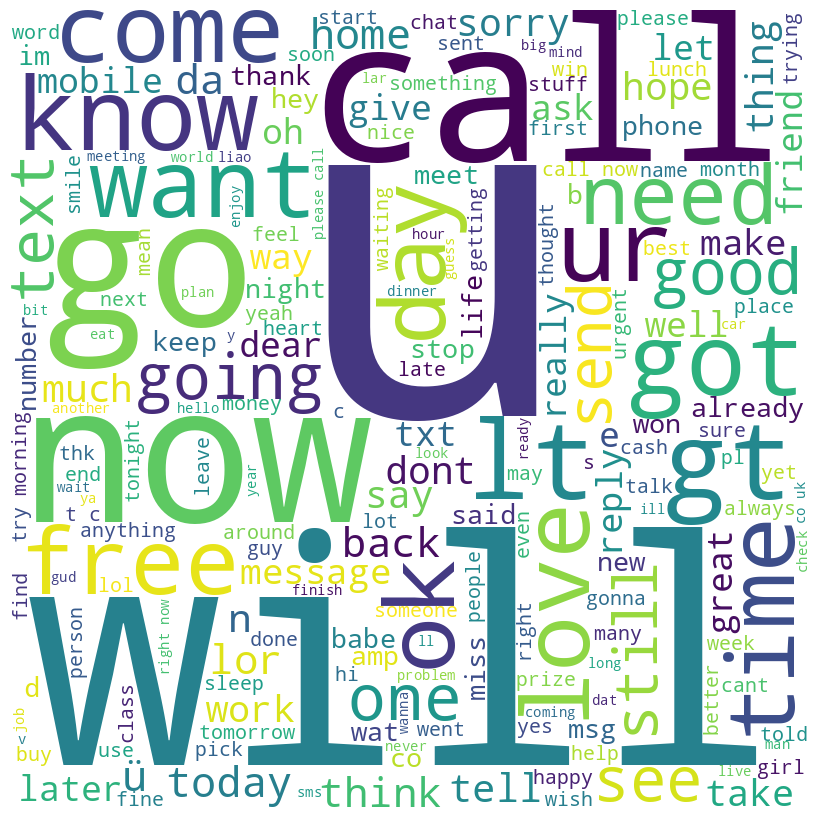

In [68]:
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()